# Predicting variation in EUR/USD exchange rate

First let's set the working directory and then load the data

In [46]:
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [47]:
import pandas as pd
import numpy as np
df_merged = pd.read_csv("results/sentiment_ecb_pricing.csv.gz", compression="gzip")
df_merged

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,2008-10-31,1.2757,1.3035,-2.132720,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,2008-12-03,1.2623,1.2697,-0.582815,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,2008-12-09,1.2838,1.2854,-0.124475,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,2008-12-24,1.4005,1.3978,0.193161,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,2009-01-05,1.3582,1.3866,-2.048175,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2022-07-11,1.0098,1.0163,-0.639575,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,2022-07-12,1.0042,1.0098,-0.554565,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,2022-07-13,1.0067,1.0042,0.248954,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,2022-07-14,1.0005,1.0067,-0.615874,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


In [48]:
df_merged.columns

Index(['date', 'eur_usd_rate', 'previous_eur_pricing',
       'percent_change_pricing', '5_days_rolling_mean_pricing',
       '10_days_rolling_mean_pricing', '60_days_rolling_mean_pricing',
       '120_days_rolling_mean_pricing', '5_days_exp_rolling_mean_pricing',
       '10_days_exp_rolling_mean_pricing', '60_days_exp_rolling_mean_pricing',
       '120_days_exp_rolling_mean_pricing', 'quantile_0.1_neg_sent',
       'quantile_0.25_neg_sent', 'quantile_0.35_neg_sent',
       'quantile_0.50_neg_sent', 'quantile_0.65_neg_sent',
       'quantile_0.75_neg_sent', 'quantile_0.9_neg_sent', 'mean_neg_sent',
       'sum_neg_sent', 'count_neg_sent', 'std_neg_sent',
       'quantile_0.1_10_days_moving_neg_sent',
       'quantile_0.25_10_days_moving_neg_sent',
       'quantile_0.35_10_days_moving_neg_sent',
       'quantile_0.50_10_days_moving_neg_sent',
       'quantile_0.65_10_days_moving_neg_sent',
       'quantile_0.75_10_days_moving_neg_sent',
       'quantile_0.9_10_days_moving_neg_sent', 'me

Subset the data selecting only predictors

In [78]:
predictors = df_merged.drop(["date", 
                             "eur_usd_rate", 
                             "percent_change_pricing", 
                             "previous_eur_pricing"], inplace=False, axis=1)
predictors

,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_neg_sent,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,1.3035,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,1.396575,1.446624,0.00,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,1.2697,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959,0.04,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,1.2854,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,1.322807,1.383454,0.00,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,1.3978,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,1.339918,1.382339,0.00,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,1.3866,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,1.348158,1.383281,0.00,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0163,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,0.00,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,1.0098,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,0.00,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,1.0042,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,0.00,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,1.0067,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439,0.00,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


Now let's split the predictors between those related to EUR pricing and those of Twitter

In [79]:
predictors_eur_pricing = predictors[[column for column in predictors.columns if "rolling_mean_" in column]]
predictors_eur_pricing

,previous_eur_pricing
0,1.3035
1,1.2697
2,1.2854
3,1.3978
4,1.3866
...,...
3416,1.0163
3417,1.0098
3418,1.0042
3419,1.0067


In [80]:
predictors_twitter = predictors[[column for column in predictors.columns if "rolling_mean_" not in column]]
predictors_twitter

,previous_eur_pricing,quantile_0.1_neg_sent,quantile_0.25_neg_sent,quantile_0.35_neg_sent,quantile_0.50_neg_sent,quantile_0.65_neg_sent,quantile_0.75_neg_sent,quantile_0.9_neg_sent,mean_neg_sent,sum_neg_sent,count_neg_sent,std_neg_sent
0,1.3035,0.00,0.0,0.00000,0.0000,0.00000,0.0000,0.0000,0.000000,0.000,4.0,0.000000
1,1.2697,0.04,0.1,0.10040,0.1010,0.10640,0.1100,0.1712,0.104600,0.523,5.0,0.067140
2,1.2854,0.00,0.0,0.00000,0.0000,0.04100,0.1230,0.2715,0.090500,0.543,6.0,0.142241
3,1.3978,0.00,0.0,0.01155,0.1155,0.21945,0.2445,0.2688,0.129000,0.516,4.0,0.130405
4,1.3866,0.00,0.0,0.00000,0.0000,0.02850,0.2105,0.3053,0.095083,1.141,12.0,0.139635
...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0163,0.00,0.0,0.00000,0.0550,0.09100,0.1290,0.2230,0.079722,22.402,281.0,0.091887
3417,1.0098,0.00,0.0,0.00000,0.0695,0.11575,0.1480,0.2170,0.087720,47.018,536.0,0.094182
3418,1.0042,0.00,0.0,0.00000,0.0465,0.09735,0.1240,0.2070,0.075525,50.904,674.0,0.091935
3419,1.0067,0.00,0.0,0.00000,0.0580,0.10000,0.1320,0.2080,0.079810,47.008,589.0,0.090081


Now let's convert the response variable, which is the EUR/USD exchange rate, and the predictors to numpy arrays

In [81]:
y = df_merged["eur_usd_rate"].values
X = predictors #all predictors
X_eur_pricing = predictors_eur_pricing.values #eur pricing predictors
X_twitter = predictors_twitter.values #twitter sentiment predictors

In [82]:
print(y.shape)
print(X.shape)
print(X_eur_pricing.shape)
print(X_twitter.shape)

(3421,)
(3421, 86)
(3421, 1)
(3421, 12)


## Modeling with Ridge

In [45]:
from sklearn.linear_model import Ridge
#Ridge().fit()

## Modeling with Random Forest

We are going to calculate the predictive power of the RF models using CV. Therefore, we first obtain training-evaluation splits

In [83]:
#create 5 training-evaluation splits
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25, random_state=6383287)

Then calculate R2 in the evaluation set of each partition considering the three different sets of predictors

In [74]:
#full model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_full_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the full model on 5 evaluation sets: {average_r2_full_model}"

'Average R2 of the full model on 5 evaluation sets: 0.9959841989972252'

In [84]:
#only eur pricing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
average_r2_eur_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_eur_pricing, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the eur pricing-only model on 5 evaluation sets: {average_r2_eur_model}"

'Average R2 of the eur pricing-only model on 5 evaluation sets: 0.9952668201760865'

In [85]:
#only twitter
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model on 5 evaluation sets: {average_r2_twitter_model}"



'Average R2 of the twitter-only model on 5 evaluation sets: 0.996097891501208'

Let's fit the models to the whole dataset and see predictor importance and predicted vs. observed

In [18]:
full_model = RandomForestRegressor(random_state=6383287)
eur_model = RandomForestRegressor(random_state=6383287)
twitter_model = RandomForestRegressor(random_state=6383287)

In [19]:
full_model.fit(X=X, y=y)
eur_model.fit(X=X_eur_pricing, y=y)
twitter_model.fit(X=X_twitter, y=y)

RandomForestRegressor(random_state=6383287)

In [20]:
full_model_pred = full_model.predict(X=X)
eur_model_pred = eur_model.predict(X=X_eur_pricing)
twitter_model_pred = twitter_model.predict(X=X_twitter)

<AxesSubplot:>

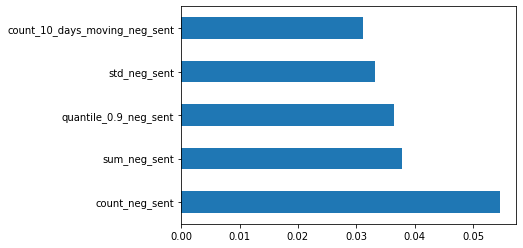

In [68]:
#full model
pd.Series(full_model.feature_importances_, index=predictors.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

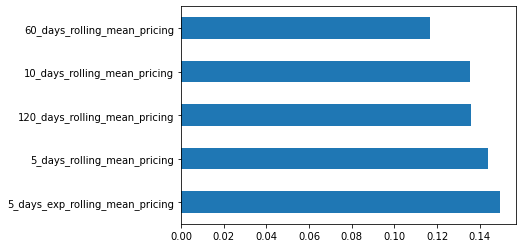

In [69]:
#eur pricing model only
pd.Series(eur_model.feature_importances_, index=predictors_eur_pricing.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

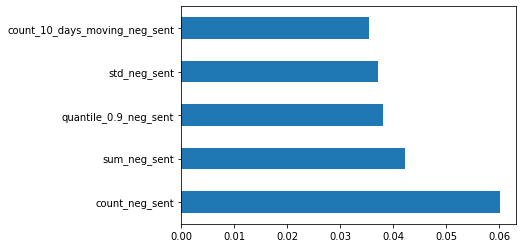

In [70]:
#twitter predictors only
pd.Series(twitter_model.feature_importances_, index=predictors_twitter.columns).nlargest(5).plot(kind='barh')

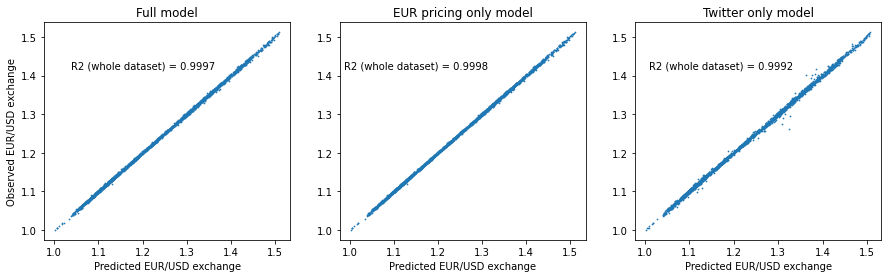

In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=full_model_pred, y=y, s=0.5)
ax2.scatter(x=eur_model_pred, y=y, s=0.5)
ax3.scatter(x=twitter_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Full model")
ax1.set_ylabel("Observed EUR/USD exchange")
ax1.set_xlabel("Predicted EUR/USD exchange")
ax2.title.set_text("EUR pricing only model")
ax2.set_xlabel("Predicted EUR/USD exchange")
ax3.title.set_text("Twitter only model")
ax3.set_xlabel("Predicted EUR/USD exchange")


#add R2
ax1.text(0.40, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, full_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.51, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, eur_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax3.text(2.75, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, twitter_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

In [22]:
from sklearn import metrics 
metrics.r2_score(y, df_merged["previous_eur_pricing"])

0.9966603691464807

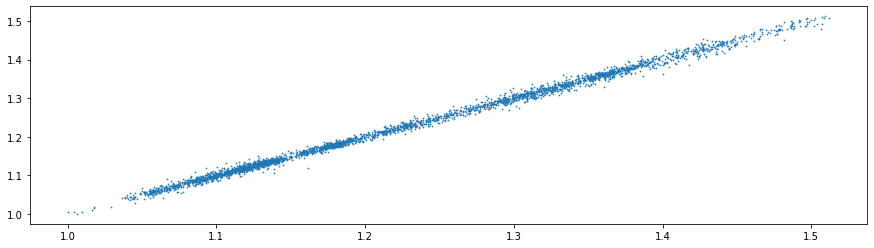

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, ax1 = plt.subplots(1,1, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=df_merged["previous_eur_pricing"], y=y, s=0.5)


In [24]:
(0.9992-0.9966603691464807)*100

0.253963085351927

The R2 values in the whole dataset are above 0.8, while in the evaluation dataseta are negative, it seems that there is overfitting and it could be caused by random forest, so we are going to optimize parameters. Calculating the change in price is a tougher problem, but it should not be so different between the whole dataset and evaluation datasets.

In [76]:
full_model_2 = RandomForestRegressor(random_state=6383287)
eur_model_2 = RandomForestRegressor(random_state=6383287)
twitter_model_2 = RandomForestRegressor(random_state=6383287)

In [212]:
##use gridsearch to optimize the parameters of the model
#make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

##parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#make a dict with the parameters and values to be explored
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#shuffle
shuffle_split_grid = ShuffleSplit(n_splits=3, test_size=0.25, random_state=6383287)
    #CHECK IN MORE DETAIL
    #This seems to be equivalent to: 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        #But, it is usable for GridSearchCV
       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy


#prepare the gridsearch with the pipe across these parameter values using 3 cores
#search = GridSearchCV(twitter_model, params, n_jobs=-2, cv=shuffle_split_grid, scoring="r2")
search = RandomizedSearchCV(twitter_model, params, n_iter=20, cv=shuffle_split_grid, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
    #we can use random search if we have many parameters, so the total number of combinations of all parameters
        #will be veery high
        #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #for scoring options
        #sklearn.metrics.SCORERS.keys())
        
#make the search for out data
search.fit(X_twitter, y)

#print the best score with 3 decimals
print("Best parameter (CV score=%0.3f):" % search.best_score_)

#print the best value of the hyperparameter
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameter (CV score=-0.042):
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [213]:
search.cv_results_

{'mean_fit_time': array([  3.59586318,  18.67073401, 290.21490057,  30.1193037 ,
        556.72681173,  18.14782095, 981.83149529,   2.82246987,
        254.5312887 , 474.04540793, 132.07625564,  29.09145657,
         28.73645457,  58.70029624,  68.1570398 , 511.19356624,
         25.90761431, 164.48155085, 575.29435587, 297.28621459]),
 'std_fit_time': array([ 0.39065444,  2.56255555,  8.23523576,  1.1622362 , 31.78065441,
         3.32494643, 44.87555461,  0.13089031,  7.47005912, 13.30549566,
         0.99370852,  0.19071284,  0.39132922,  1.00875039,  3.53075678,
        30.4061039 ,  0.18898798,  1.13689793, 14.83050813, 13.12582977]),
 'mean_score_time': array([0.04718486, 0.14725025, 0.25115856, 0.37747105, 0.34497396,
        0.13148204, 0.65540902, 0.04109852, 0.35841028, 0.65248704,
        0.10830768, 0.20637528, 0.33653808, 0.40389864, 0.51257857,
        0.24846403, 0.29247554, 0.22630699, 0.27727   , 0.33932455]),
 'std_score_time': array([0.00026551, 0.01742087, 0.032578

## Modeling with Supporting Vector Machines

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
print(metrics.r2_score(y, SVR(kernel="linear", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

In [12]:
from sklearn.svm import SVR
from sklearn import metrics
print(metrics.r2_score(y, SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_eur_pricing, y=y).predict(X=X_eur_pricing)))
print(metrics.r2_score(y, SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))

0.09170057298424283
0.9701505348419782


In [34]:
#create 5 training-evaluation splits
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25, random_state=6383287)

In [39]:
#full model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_full_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the full model on 5 evaluation sets: {average_r2_full_model}"

'Average R2 of the full model on 5 evaluation sets: 0.6612569308797338'

In [42]:
#only twitter
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model on 5 evaluation sets: {average_r2_twitter_model}"



'Average R2 of the twitter-only model on 5 evaluation sets: -0.007476766494548226'

In [43]:
#only eur pricing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
average_r2_eur_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X_eur_pricing, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the eur pricing-only model on 5 evaluation sets: {average_r2_eur_model}"

'Average R2 of the eur pricing-only model on 5 evaluation sets: 0.024817168378046216'

## Notes about current state

- After the presentation I did, I have compared the null model with only pricing data and the twitter augmented model using cross validation. Basically, I have made 5 splits of the data in and calculated the mean R2 in the evaluation dataset. Using this approach, the Twitter is still much better than the null model (1-5%), but the problem is that the R2 values are negative in both models when predicting in the evaluation datasets! Twitter improves, but the models are very bad! R2 is around 0.83 when predicting in the whole dataset. Maybe there is overfitting, but I have reduced the predictors selecting those with more importance, and I get similar results. This was predicting the change of the Euro value in percentage and I have used linear models, random forest, decision trees, supporting vector machines and neural networks testing different parameters.

- So I have come back to the prediction of just the eur pricing. Here, using cross validation I found that the Twitter model as good as the null model. One problem I see with this approach is that the null model is almost perfect, with an R2 of 0.995 0.998. So I decided to check what happens using just twitter sentiment. 

- A model using the sentiment of twitter (including a moving calculation of mean, median, etc..) get an R2 of 0.99 also!! maybe 0.993 or 0.994 using cross validation!! To me this is a very interesting result. Yes, I have not surpassed the pricing model, but I am there just using Twitter! One could say that chanages in pricing influence the sentiment of twitter, so the pricing is already there, but it is too high R2 for a predictor that does not include the actual pricing values of the previous days. 

- In addition, what would happen in a situation of uncertainty? Maybe there twitter is faster, and dected changes in the expectations of economic agents before an actual change in the pricing. Also, what about other currencies that are less stable? maybe twitter sentiment can surpass previous pricing in these scenarios. 

- I think a company could use my approach on searching for topics relevant for the price of a currency and use them in machine learning framework to improve their currency predictions. Do you think this is good enough for the capstone?

- Comments Robert
    - check data leak
        - shuffle columns and see if the model still behaves well
    - use cross validation with temporal data can mix data? but I have in each row the value of the corresponding previous days
    - min_sample leaf (2,200,), min split
    - null model using just the exact previous value as prediction?
        - try to do it in evaluation also?


### Next steps

- check moving averages
    - check that no eur pricing data is used in these calculations!!!
    - they consider the current day euro and sentiment value?
- read:
    - The predictive power of public Twitter sentiment for forecasting cryptocurrency prices
        - INTERESTING APPROACH TO CLEAN TWEETS AND THEN APPLY VADER
        - https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e
- Extend to other currencies?